## 1.Defining the Question

As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

###a) The Question

- What are the most factors that affect house prices?
- Which model would be effective for house sales prediction?

### b) The Metric Of Success

the metric of success for regression models is R-Squared and RMSE.

linear regression is the base model and it has an R-Squared of 0.975 while models lasso has 0.901,ridge and elascic Net has R-Squared of 0.695 . 

The succes of the model will be determined if the RMSe is lowest.

### c) The context

the columns of the dataset are illusreated as follows:

Id 

price  - Price of the house

bedrooms - Number of Bedrooms

bathrooms - Number of Bathrooms

sqft_living - Square feet area of living area

sqft_lot  - Square feet area of parking Layout

floors - Number of Floors

waterfront - Whether waterfront is there or not

view - Number of Views

grade - Grades

sqft_above

sqft_basement - Square feet area off basement

yr_built - Year the house is built

yr_renovated - Year the house is renovated

zipcode - zipcode os the house

lat : Latitude of the house

lon : Longitude of the house

sqft_living15

sqft_lot15

### d) Experimental Design

- Define the question

- the metric for success

- the context
 
- experimental design taken.
- Read and explore the given dataset.

- Define the appropriateness of the available data to answer the given question.

- Feature engineering

- EDA(univariate and Bivariate analysis

- Linear regression

- Lasso regression

- Ridge Regression

- ElasticNet regression

- conclusion

- Recommendation



##2.loading and previewing the dataset

### a) Importing libraries

In [1]:
#importing pandas
import pandas as pd

#importing numpy
import numpy as np

#importing matplotlib
import matplotlib.pyplot as plt

#importing sklearn.preprocessing
from sklearn.preprocessing import PolynomialFeatures

from sklearn.preprocessing import LabelEncoder
#importing sklearn.model_selection
from sklearn.model_selection import train_test_split

# Import LinearRegression method from sklearn linear_model library
from sklearn.linear_model import LinearRegression

#importing sklearn.metrics
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import model_selection

#importing sklearn.ensemble
from sklearn.ensemble import RandomForestClassifier
#importing seaborn
import seaborn as sns

#importing scipy
import scipy.stats as stats
import scipy as sp
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import ElasticNet


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### b) loading the dataset

In [2]:
#dataset
house = pd.read_csv("/content/Independent Project Week 7 - house_data.csv")

###c) Previewing the dataset

In [3]:
#previewing the first five entries
house.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
#previewing the last five entries
house.tail(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287
21612,1523300157,325000.0,2,0.75,1020,1076,2.0,0,0,3,7,1020,0,2008,0,98144,47.5941,-122.299,1020,1357


In [5]:
#Shape of the dataset
house.shape

(21613, 20)

house dataset has 21613 rows and 20 columns

In [6]:
#Dropping the ID since it has little significance in the analysis
house=house.drop(columns=['id','zipcode'])


In [7]:
#columns in the dataset
house.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [8]:
#price column
house['bedrooms'].unique()

array([ 3,  2,  4,  5,  1,  6,  7,  0,  8,  9, 11, 10, 33])

In [9]:
#information of the dataset
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21613 non-null  float64
 1   bedrooms       21613 non-null  int64  
 2   bathrooms      21613 non-null  float64
 3   sqft_living    21613 non-null  int64  
 4   sqft_lot       21613 non-null  int64  
 5   floors         21613 non-null  float64
 6   waterfront     21613 non-null  int64  
 7   view           21613 non-null  int64  
 8   condition      21613 non-null  int64  
 9   grade          21613 non-null  int64  
 10  sqft_above     21613 non-null  int64  
 11  sqft_basement  21613 non-null  int64  
 12  yr_built       21613 non-null  int64  
 13  yr_renovated   21613 non-null  int64  
 14  lat            21613 non-null  float64
 15  long           21613 non-null  float64
 16  sqft_living15  21613 non-null  int64  
 17  sqft_lot15     21613 non-null  int64  
dtypes: flo

house dataset has all numeric variable and it does nit have categorical variables. The data typee of the variables are integers and float

In [10]:
#Description of the dataset
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,47.560053,-122.213896,1986.552492,12768.455652
std,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,0.138564,0.140828,685.391304,27304.179631
min,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,47.155900,-122.519000,399.000000,651.000000
25%,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,47.678000,-122.125000,2360.000000,10083.000000
max,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,47.777600,-121.315000,6210.000000,871200.000000


##4.Feature engineering

### a) Dealing with Null values

In [11]:
#checking for null values
house.isnull().sum()

price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

there is no null values in the house dataset

### b) Dealing with Duplicates

In [12]:
#checking for duplicates
house.duplicated().sum()

5

In [13]:
#Removing the duplicates
house=house.drop_duplicates()

Duplicates have been removed since they are only 3 and they will not have great impact on the analysis

###c) Dealing with Outliers

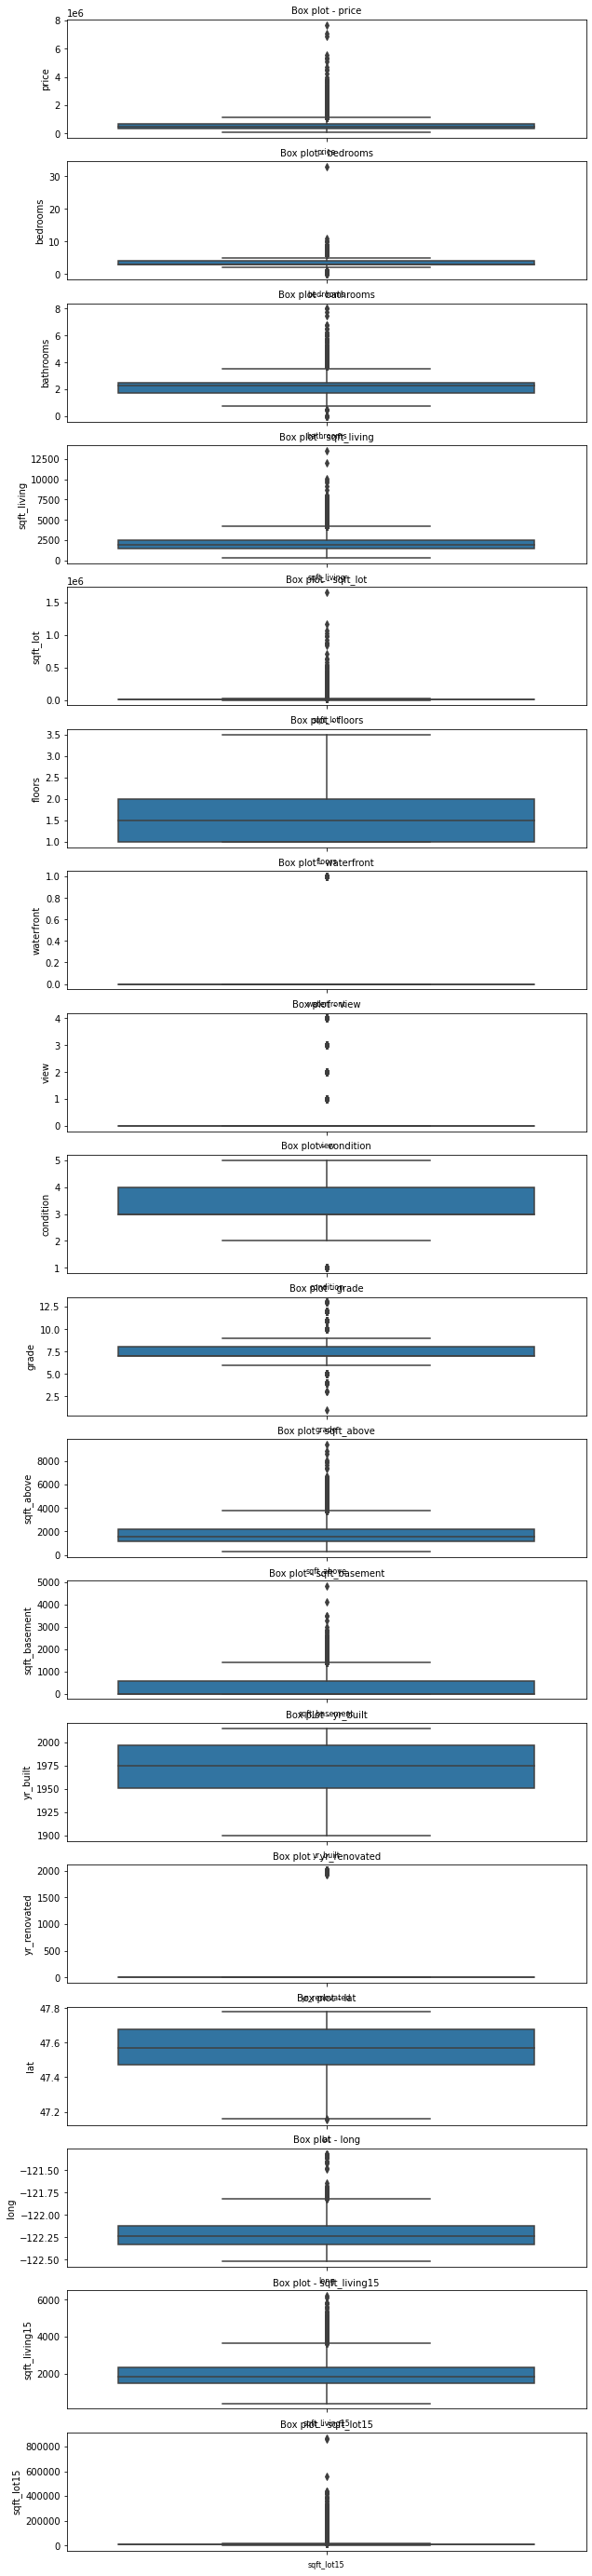

In [14]:
# Checking for Outliers
col_names = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']

fig, ax = plt.subplots(len(col_names), figsize=(10,50))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=house[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

The dataset suffers alot from outliers will not be removed since quantile regression will be performed

###d) dealing with Anomalies

In [15]:
#the column that has anomalies
house['yr_renovated'].value_counts()

0       20695
2014       91
2013       37
2003       36
2005       35
        ...  
1951        1
1959        1
1948        1
1954        1
1944        1
Name: yr_renovated, Length: 70, dtype: int64

20695 records has 0 as year. This means that that there are some houses were sold without being renovated and hence these rows will not be dropped.

### d) Multicolinearity

In [16]:
#Checking for correlation
correlation = house.corr()
correlation

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308314,0.525143,0.702044,0.089647,0.256885,0.266332,0.397462,0.036375,0.667570,0.605557,0.323860,0.054032,0.126498,0.306917,0.021531,0.585373,0.082443
bedrooms,0.308314,1.000000,0.515956,0.576640,0.031671,0.175608,-0.006591,0.079411,0.028370,0.357143,0.477569,0.303093,0.154410,0.018678,-0.008970,0.129395,0.391571,0.029197
bathrooms,0.525143,0.515956,1.000000,0.754717,0.087751,0.500754,0.063747,0.187892,-0.124941,0.665029,0.685376,0.283824,0.506038,0.050880,0.024587,0.223065,0.568692,0.087192
sqft_living,0.702044,0.576640,0.754717,1.000000,0.172809,0.354181,0.103817,0.284627,-0.058825,0.762893,0.876593,0.435061,0.318253,0.055299,0.052514,0.240150,0.756398,0.183258
sqft_lot,0.089647,0.031671,0.087751,0.172809,1.000000,-0.005113,0.021598,0.074744,-0.008988,0.113688,0.183508,0.015263,0.053154,0.007671,-0.085683,0.229530,0.144596,0.718552
floors,0.256885,0.175608,0.500754,0.354181,-0.005113,1.000000,0.023731,0.029383,-0.263728,0.458074,0.524117,-0.245646,0.489244,0.006193,0.049595,0.125592,0.280080,-0.011180
waterfront,0.266332,-0.006591,0.063747,0.103817,0.021598,0.023731,1.000000,0.401992,0.016648,0.082799,0.072076,0.080584,-0.026150,0.092949,-0.014272,-0.041916,0.086466,0.030698
view,0.397462,0.079411,0.187892,0.284627,0.074744,0.029383,0.401992,1.000000,0.045819,0.251426,0.167642,0.276993,-0.053196,0.103203,0.006047,-0.078598,0.280391,0.072566
condition,0.036375,0.028370,-0.124941,-0.058825,-0.008988,-0.263728,0.016648,0.045819,1.000000,-0.144599,-0.158273,0.174061,-0.361306,-0.060875,-0.014975,-0.106590,-0.092920,-0.003449
grade,0.667570,0.357143,0.665029,0.762893,0.113688,0.458074,0.082799,0.251426,-0.144599,1.000000,0.756090,0.168483,0.446887,0.014396,0.114100,0.198496,0.713396,0.119319


In [17]:
#Vif score
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.DataFrame(np.linalg.inv(correlation.values), index = correlation.index, columns=correlation.columns)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
price,3.284,0.284,-0.290,-20.291,-0.047,-0.004,-0.454,-0.340,-0.181,-1.023,16.819,9.057,0.645,-0.078,-0.695,0.147,-0.168,0.096
bedrooms,0.284,1.673,-0.489,0.692,0.045,0.058,0.023,0.092,-0.074,0.214,-1.565,-0.903,0.178,0.037,0.006,-0.005,0.001,0.094
bathrooms,-0.290,-0.489,3.376,23.476,-0.020,-0.671,0.050,-0.009,-0.125,-0.180,-22.302,-12.432,-0.999,-0.254,0.028,0.022,0.102,0.063
sqft_living,-19.942,1.038,23.626,1337499971677819.500,-4.997,2.153,4.898,-2.354,-0.408,33.267,-1205913740984562.250,-644518829470314.750,-16.789,-2.909,0.040,6.398,-5.331,5.751
sqft_lot,-0.047,0.045,-0.020,-5.059,2.103,0.045,0.034,-0.054,0.033,-0.039,4.389,2.410,0.090,0.022,0.063,-0.134,0.167,-1.461
floors,-0.004,0.058,-0.671,1.901,0.045,1.994,-0.003,-0.054,0.107,-0.220,-2.190,-0.273,-0.455,-0.076,-0.158,0.239,0.294,0.071
waterfront,-0.454,0.023,0.050,4.891,0.034,-0.003,1.267,-0.444,0.010,0.190,-4.336,-2.278,-0.114,-0.056,0.110,-0.003,0.075,-0.032
view,-0.340,0.092,-0.009,-2.171,-0.054,-0.054,-0.444,1.459,0.011,-0.073,2.120,0.836,0.107,-0.028,0.164,0.119,-0.290,-0.019
condition,-0.181,-0.074,-0.125,-0.427,0.033,0.107,0.010,0.011,1.244,-0.006,0.516,0.144,0.501,0.208,0.132,-0.086,0.065,-0.032
grade,-1.023,0.214,-0.180,33.679,-0.039,-0.220,0.190,-0.073,-0.006,3.733,-31.555,-16.517,-0.852,-0.049,-0.099,0.311,-0.870,0.043


The dataset has multicinearity and this will be solved by the use of ridge regression

### e) Encoding

there is no encoding will be performed since all tha variables are in numeric form

##Exploratory Data Analysis

### a)Univariate Analysis

**Viewing the unique values for each column for better visualization**

In [18]:
##House view
house['view'].unique()

array([0, 3, 4, 2, 1])

visualized using pie chart

In [19]:
#house condition
house['condition'].unique()

array([3, 5, 4, 1, 2])

visualized using pie chart

In [20]:
#House grade
house['grade'].unique()

array([ 7,  6,  8, 11,  9,  5, 10, 12,  4,  3, 13,  1])

visualized using bar chart

In [21]:
#House floors
house['floors'].unique()

array([1. , 2. , 1.5, 3. , 2.5, 3.5])

visualized using pie chart

In [22]:
#whether waterfront or not
house['waterfront'].unique()

array([0, 1])

visualized using pie chart

In [23]:
#Square feet area of packing layout
house['sqft_lot'].unique()

array([ 5650,  7242, 10000, ...,  5813,  2388,  1076])

visualized using histograph

In [24]:
#Square feet above
house['sqft_above'].unique()

array([1180, 2170,  770, 1050, 1680, 3890, 1715, 1060, 1890, 1860,  860,
       1430, 1370, 1810, 1980, 1600, 1200, 1250, 2330, 2270, 1070, 2450,
       1710, 1750, 1400,  790, 2570, 2320, 1190, 1510, 1090, 1280,  930,
       2360,  890, 2620, 2600, 3595, 1570,  920, 3160,  990, 2290, 2165,
       1640, 1000, 2130, 2830, 2250, 2420, 3250, 1850, 1590, 1260, 2519,
       1540, 1110, 1770, 2720, 2240, 3070, 2380, 2390,  880, 1040,  910,
       3450, 2350, 1900, 1010,  960, 2660, 1610,  765, 3520, 1290, 1960,
       1160, 1210, 1270, 1440, 2190, 2920, 1460, 1170, 1240, 3140, 2030,
       2310,  700, 1080, 2520, 2780, 1560, 1450, 1720, 2910, 1620, 1360,
       2070, 2460, 1390, 2140, 1320, 1340, 1550,  940, 1380, 3670, 2370,
       1130,  980, 3540, 2500, 1760, 1030, 1780, 3400, 2680, 1670, 2590,
        820, 1220, 2440, 2090, 1100, 1330, 1420, 1690, 2150, 1910, 1350,
       1940,  900, 1630, 2714,  850, 1870, 1950, 2760, 2020, 1120, 1480,
       1230, 2280, 3760, 3530,  830, 1300, 2740, 18

visualized using histograph

In [25]:
#squire feet area off basement
house['sqft_basement'].unique()

array([   0,  400,  910, 1530,  730, 1700,  300,  970,  760,  720,  700,
        820,  780,  790,  330, 1620,  360,  588, 1510,  410,  990,  600,
        560,  550, 1000, 1600,  500, 1040,  880, 1010,  240,  265,  290,
        800,  540,  380,  710,  840,  770,  480,  570, 1490,  620, 1250,
       1270,  120,  650,  180, 1130,  450, 1640, 1460, 1020, 1030,  750,
        640, 1070,  490, 1310,  630, 2000,  390,  430,  850,  210, 1430,
       1950,  440,  220, 1160,  860,  580, 2060, 1820, 1180,  200, 1150,
       1200,  680,  530, 1450, 1170, 1080,  960, 1100,  280,  870,  460,
       1400, 1320,  660, 1220,  900,  420, 1580, 1380,  475,  690,  270,
        350,  935, 1370,  980, 1470,  160,  950,   50,  740, 1780, 1900,
        340,  470,  370,  140, 1760,  130,  610,  520,  890, 1110,  150,
       1720,  810,  190, 1290,  670, 1800, 1120, 1810,   60, 1050,  940,
        310,  930, 1390, 1830, 1300,  510, 1330, 1590,  920, 1420, 1240,
       1960, 1560, 2020, 1190, 2110, 1280,  250, 23

visualized using histograph

In [26]:
#latitude
house['lat'].unique()

array([47.5112, 47.721 , 47.7379, ..., 47.3906, 47.3339, 47.6502])

visualized using histograph

In [27]:
house['sqft_living15'].unique()

array([1340, 1690, 2720, 1360, 1800, 4760, 2238, 1650, 1780, 2390, 2210,
       1330, 1370, 2140, 1890, 1610, 1060, 1280, 1400, 4110, 2240, 1220,
       2200, 1030, 1760, 1860, 1520, 2630, 2580, 1390, 1460, 1570, 2020,
       1590, 2160, 1730, 1290, 2620, 2470, 2410, 3625, 1580, 3050, 1228,
       2680,  970, 1190, 1990, 1410, 1480, 2730, 1950, 2250, 2690, 2960,
       2270, 2570, 2500, 1440, 2750, 2221, 1010, 3390, 3530, 1640, 1510,
       2420, 1940, 3240, 1680,  890, 1130, 3350, 2350, 1870, 1720, 1850,
       1900, 1980, 2520, 1350, 1750, 1160, 2550, 2370, 1240, 1270, 2990,
       1380, 1540, 2090, 2640, 1830, 1620, 1880, 2340, 1710, 2700, 3060,
       2660, 1700, 1970, 1420, 2060, 2480, 1550, 1170, 2820, 1560, 2230,
       2840, 1450, 1500, 3160, 1200, 3400, 2110, 2920, 1770, 1070, 1930,
       3740, 2260, 1670, 2290, 1050, 2540, 2190, 2030, 1230, 2330, 1300,
       1430, 2770, 1250, 1630, 2590, 2130, 1100, 3836, 1320, 2120, 3070,
       1910, 2080, 1960, 2280, 1150, 3430, 2070, 26

visualized using histograph

In [28]:
#sqft_lot15
house['sqft_lot15'].unique()

array([5650, 7639, 8062, ..., 5731, 1509, 2007])

In [29]:
#Year built
house['yr_built'].unique()

array([1955, 1951, 1933, 1965, 1987, 2001, 1995, 1963, 1960, 2003, 1942,
       1927, 1977, 1900, 1979, 1994, 1916, 1921, 1969, 1947, 1968, 1985,
       1941, 1915, 1909, 1948, 2005, 1929, 1981, 1930, 1904, 1996, 2000,
       1984, 2014, 1922, 1959, 1966, 1953, 1950, 2008, 1991, 1954, 1973,
       1925, 1989, 1972, 1986, 1956, 2002, 1992, 1964, 1952, 1961, 2006,
       1988, 1962, 1939, 1946, 1967, 1975, 1980, 1910, 1983, 1978, 1905,
       1971, 2010, 1945, 1924, 1990, 1914, 1926, 2004, 1923, 2007, 1976,
       1949, 1999, 1901, 1993, 1920, 1997, 1943, 1957, 1940, 1918, 1928,
       1974, 1911, 1936, 1937, 1982, 1908, 1931, 1998, 1913, 2013, 1907,
       1958, 2012, 1912, 2011, 1917, 1932, 1944, 1902, 2009, 1903, 1970,
       2015, 1934, 1938, 1919, 1906, 1935])

In [30]:
#Year renovated
house['yr_renovated'].unique()

array([   0, 1991, 2002, 2010, 1999, 1992, 2013, 1994, 1978, 2005, 2008,
       2003, 1984, 1954, 2014, 2011, 1974, 1983, 1945, 1990, 1988, 1957,
       1977, 1981, 1995, 2000, 1998, 1970, 1989, 2004, 1986, 2009, 2007,
       1987, 1973, 2006, 1985, 2001, 1980, 1971, 1979, 1997, 1950, 1969,
       1948, 2015, 1968, 2012, 1963, 1951, 1993, 1962, 1996, 1972, 1953,
       1955, 1982, 1956, 1940, 1976, 1946, 1975, 1958, 1964, 1959, 1960,
       1967, 1965, 1934, 1944])

In [31]:
#Mean,Median,Standard Deviation and percentile
house.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15
count,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000,21608.000
mean,540192.408,3.371,2.115,2079.959,15109.616,1.494,0.008,0.234,3.409,7.657,1788.415,291.544,1971.000,84.330,47.560,-122.214,1986.583,12770.108
std,367399.634,0.930,0.770,918.506,41424.914,0.540,0.087,0.766,0.651,1.175,828.141,442.613,29.371,401.517,0.139,0.141,685.421,27307.007
min,75000.000,0.000,0.000,290.000,520.000,1.000,0.000,0.000,1.000,1.000,290.000,0.000,1900.000,0.000,47.156,-122.519,399.000,651.000
25%,321837.500,3.000,1.750,1429.250,5040.000,1.000,0.000,0.000,3.000,7.000,1190.000,0.000,1951.000,0.000,47.471,-122.328,1490.000,5100.000
50%,450000.000,3.000,2.250,1910.000,7620.000,1.500,0.000,0.000,3.000,7.000,1560.000,0.000,1975.000,0.000,47.572,-122.231,1840.000,7620.000
75%,645000.000,4.000,2.500,2550.000,10690.500,2.000,0.000,0.000,4.000,8.000,2210.000,560.000,1997.000,0.000,47.678,-122.125,2360.000,10083.250
max,7700000.000,33.000,8.000,13540.000,1651359.000,3.500,1.000,4.000,5.000,13.000,9410.000,4820.000,2015.000,2015.000,47.778,-121.315,6210.000,871200.000


In [104]:
#Mean
house.mean()

price           540192.408
bedrooms             3.371
bathrooms            2.115
sqft_living       2079.959
sqft_lot         15109.616
floors               1.494
waterfront           0.008
view                 0.234
condition            3.409
grade                7.657
sqft_above        1788.415
sqft_basement      291.544
yr_built          1971.000
yr_renovated        84.330
lat                 47.560
long              -122.214
sqft_living15     1986.583
sqft_lot15       12770.108
dtype: float64

In [105]:
#Median
house.median()

price           450000.000
bedrooms             3.000
bathrooms            2.250
sqft_living       1910.000
sqft_lot          7620.000
floors               1.500
waterfront           0.000
view                 0.000
condition            3.000
grade                7.000
sqft_above        1560.000
sqft_basement        0.000
yr_built          1975.000
yr_renovated         0.000
lat                 47.572
long              -122.231
sqft_living15     1840.000
sqft_lot15        7620.000
dtype: float64

In [32]:
#Skewness
skew= house.skew(axis=0, skipna=True, level = None,numeric_only = None)
print('''year built and latitude are negatively skewdes meaning that the left
tail is long relative to the right tail while the othe attributes are
positively skewed meaning that the right tail is long relative to the left tail.''')
skew

year built and latitude are negatively skewdes meaning that the left
tail is long relative to the right tail while the othe attributes are
positively skewed meaning that the right tail is long relative to the left tail.


price            4.021
bedrooms         1.974
bathrooms        0.511
sqft_living      1.471
sqft_lot        13.059
floors           0.616
waterfront      11.384
view             3.397
condition        1.033
grade            0.772
sqft_above       1.447
sqft_basement    1.578
yr_built        -0.470
yr_renovated     4.552
lat             -0.485
long             0.885
sqft_living15    1.108
sqft_lot15       9.506
dtype: float64

In [33]:
#Kurtosis
house.kurtosis(axis=0, skipna=True,level=None, numeric_only = None)

price            34.515
bedrooms         49.066
bathrooms         1.279
sqft_living       5.242
sqft_lot        285.019
floors           -0.485
waterfront      127.602
view             10.901
condition         0.525
grade             1.192
sqft_above        3.402
sqft_basement     2.714
yr_built         -0.657
yr_renovated     18.722
lat              -0.677
long              1.050
sqft_living15     1.597
sqft_lot15      150.733
dtype: float64

**Plotting pie charts**

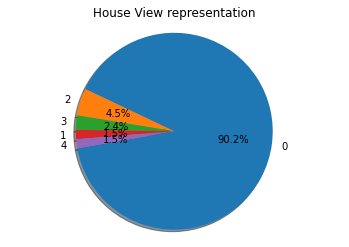

Most of the houses sold had a view rating of 0


In [34]:
#The view pie chart representation
house_view = house['view'].value_counts()


#plotting pie chart
plt.pie(house_view,labels = house_view.index,autopct = '%1.1f%%',shadow = True, startangle = 190)

#specify axis type
plt.axis('equal')

#set title
plt.title('House View representation')

#show plot
plt.show()
#Explanation
print("Most of the houses sold had a view rating of 0")

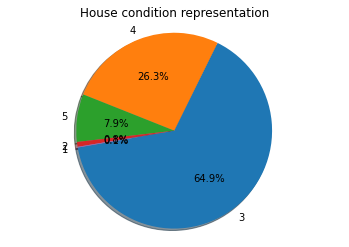

Over 90% of the houses sold had a condition rating of 3, 4 and 5


In [35]:
#The view pie chart representation
house_condition = house['condition'].value_counts()


#plotting pie chart
plt.pie(house_condition,labels = house_condition.index,autopct = '%1.1f%%',shadow = True, startangle = 190)

#specify axis type
plt.axis('equal')

#set title
plt.title('House condition representation')

#show plot
plt.show()

#Explanation
print("Over 90% of the houses sold had a condition rating of 3, 4 and 5")

The house whose condition was rated to 3 had the highest sales

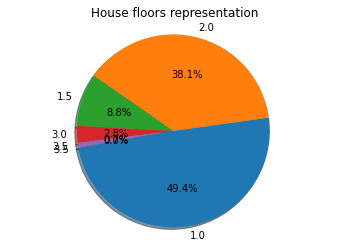

most of the houses sold had either 1 or 2 floors


In [36]:
#The floors pie chart representation
house_floors= house['floors'].value_counts()


#plotting pie chart
plt.pie(house_floors,labels = house_floors.index,autopct = '%1.1f%%',shadow = True, startangle = 190)

#specify axis type
plt.axis('equal')

#set title
plt.title('House floors representation')


#show plot
plt.show()
#Explanation
print("most of the houses sold had either 1 or 2 floors")

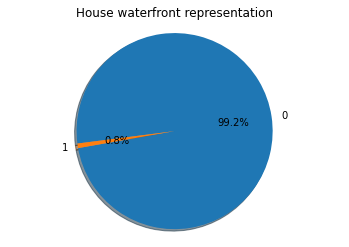

Most of the houses sold had no waterfront


In [37]:
#The waterfront pie chart representation
house_waterfront = house['waterfront'].value_counts()


#plotting pie chart
plt.pie(house_waterfront,labels = house_waterfront.index,autopct = '%1.1f%%',shadow = True, startangle = 190)

#specify axis type
plt.axis('equal')

#set title
plt.title('House waterfront representation')

#show plot
plt.show()
#Explanation
print("Most of the houses sold had no waterfront")

The houses that had waterfront had more sales compared to the one which did not have

Most of the houses sold were graded 7 and 8


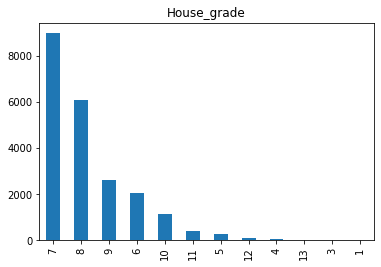

In [38]:
#Barchart for grade
(house['grade'].value_counts()).plot.bar(title="House_grade");

#explanation
print("Most of the houses sold were graded 7 and 8")

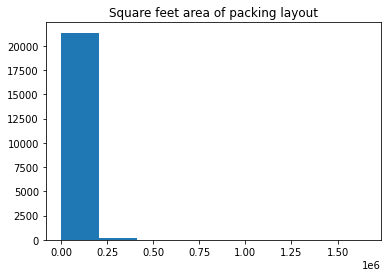

In [39]:
#Histograph of Square feet area of packing layout
plt.hist(house['sqft_lot'],bins=8)
plt.title('Square feet area of packing layout')
plt.show()

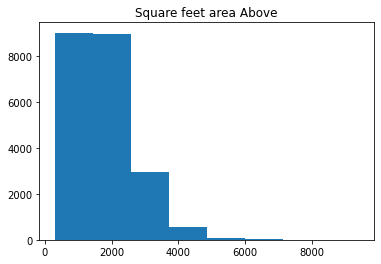

most of the houses sold covered approximately 3000 square feet area Above


In [40]:
#Histograph of Square feet Above
plt.hist(house['sqft_above'],bins=8)
plt.title('Square feet area Above')
plt.show()
#Explanation
print("most of the houses sold covered approximately 3000 square feet area Above")

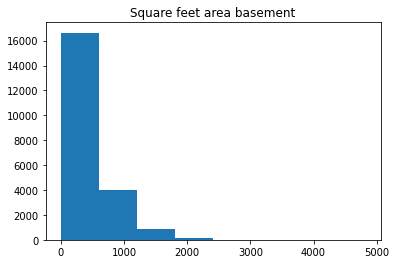

most of the houses sold covered approximately 500 square feet area Above


In [41]:
#Histograph of Square feet basement
plt.hist(house['sqft_basement'],bins=8)
plt.title('Square feet area basement')
plt.show()
#Explanation
print("most of the houses sold covered approximately 500 square feet area Above")

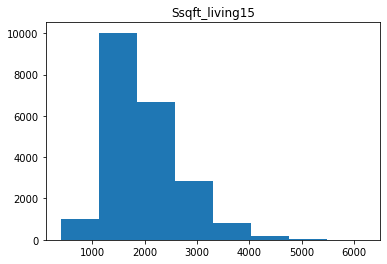

Most of the houses sold covered approximately between 500 and 2500 
sqft_living15 area Above


In [42]:
#Histograph of sqft_living15
plt.hist(house['sqft_living15'],bins=8)
plt.title('Ssqft_living15')
plt.show()
#Explanation
print('''Most of the houses sold covered approximately between 500 and 2500 
sqft_living15 area Above''')

### b) Bivariate Analysis

From the scatter plot the highest price and price variation were located
between 47.5 and 47.7 latitude


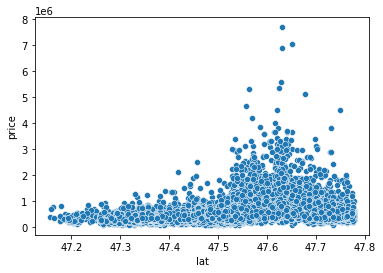

In [43]:
#scatter plot for price versus latitude
sns.scatterplot(data=house,x='lat',y='price');

#explanation
print('''From the scatter plot the highest price and price variation were located
between 47.5 and 47.7 latitude''')

From the scatter plot the highest price and price variation were located
between -122.4 and -122.2 latitude


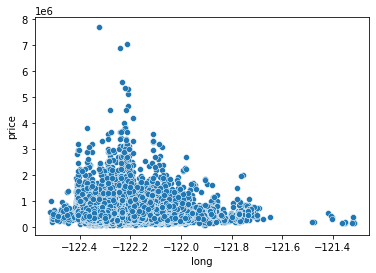

In [44]:
#scatter plot for price versus longitude
sns.scatterplot(data=house,x='long',y='price');
#explanation
print('''From the scatter plot the highest price and price variation were located
between -122.4 and -122.2 latitude''')

From the scatter plot the highest price and price variation were recorded
between -122.4 and -122.2 latitude


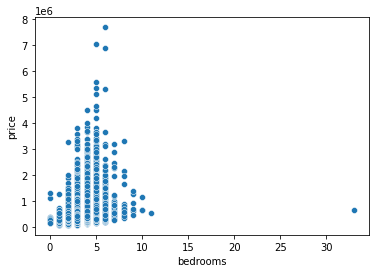

In [45]:
#scatter plot for price versus bedrooms
sns.scatterplot(data=house,x='bedrooms',y='price');
#explanation
print('''From the scatter plot the highest price and price variation were recorded
between -122.4 and -122.2 latitude''')

the price variation increases as the sqft_living increases


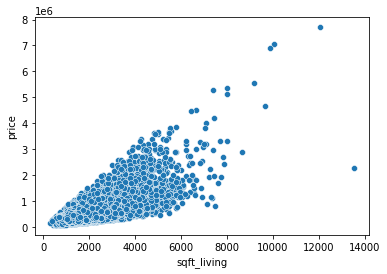

In [46]:
#scatter plot for price versus sqft_living
sns.scatterplot(data=house,x='sqft_living',y='price');

#Explanation
print("the price variation increases as the sqft_living increases")

price and view has no direct correlation


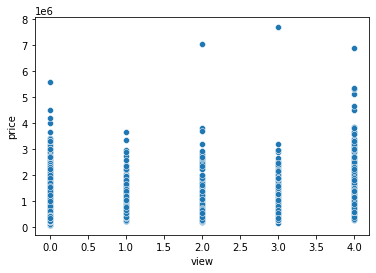

In [47]:
#scatter plot for price versus view
sns.scatterplot(data=house,x='view',y='price');

#Explanation]
print("price and view has no direct correlation")

price and floors has no direct correlation


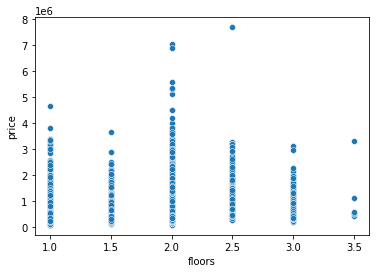

In [48]:
#scatter plot for price versus floors
sns.scatterplot(data=house,x='floors',y='price');

#Explanation]
print("price and floors has no direct correlation")

house prices and price variation have been uniformly distributed across all the years


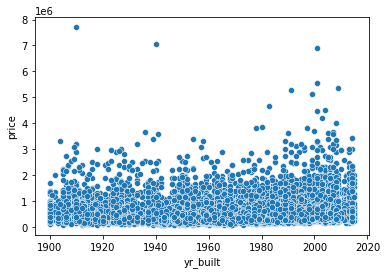

In [49]:
#scatter plot for price versus floors
sns.scatterplot(data=house,x='yr_built',y='price');

#explanation
print("house prices and price variation have been uniformly distributed across all the years")

house prices and price variation have been uniformly distributed across all the years


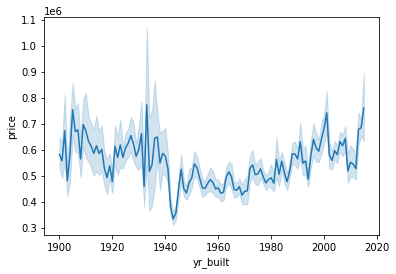

In [50]:
#scatter plot for price versus floors
sns.lineplot(data=house,x='yr_built',y='price');

#explanation
print("house prices and price variation have been uniformly distributed across all the years")

##<font color="green"> Solving the Question</font>

##5.Multiple Linear regression

### a) Defining the independent and adependent variables

In [51]:
#independent variable and dependent variable
X,y = house[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']],house['price']




### b) Spliting the dataset

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [53]:
#training the algorith
regressor=LinearRegression()
regressor.fit(X_train,y_train)

import statsmodels.api as sm
#add a constant
X_train=sm.add_constant(X_train)

#Summary in linear regression
model = sm.OLS(y_train,X_train).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.697
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     2488.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:35:58   Log-Likelihood:            -2.3591e+05
No. Observations:               17286   AIC:                         4.719e+05
Df Residuals:                   17269   BIC:                         4.720e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.811e+07    1.8e+06    -21.149

- For a uinit increase in bedrooms price decreases by -3.284e+04 units  
- For a uinit increase in bathrooms price increses by 3.844e+04 units 
- For a uinit increase in sqft_living price increases by 110.9823 units      


In [54]:
#printing the intercept and the slope
#Intercept
print("intercept:",regressor.intercept_)

#slope
print("Slope:", regressor.coef_)

intercept: -38106757.33289945
Slope: [-3.28425320e+04  3.84382155e+04  1.10982515e+02  1.68104682e-01
  4.38117876e+02  6.26818420e+05  4.75407185e+04  3.24921832e+04
  9.88423593e+04  7.24727939e+01  3.85097212e+01 -2.37543384e+03
  2.39443070e+01  5.58833649e+05 -1.26629031e+05  2.53605599e+01
 -4.41504212e-01]


In [55]:
#Fitting linear regression model
model = sm.OLS(y,X).fit()


#View model summary
pd.set_option('display.float_format', lambda x: '%.3f' % x)


### c) Prediction

In [56]:
#making prediction
y_pred = regressor.predict(X_test)

#making the comparrision between the actual price and the predicted price
price_prediction = pd.DataFrame({'Actual_Price':y_test,'Predicted_price':y_pred})
price_prediction

,Actual_Price,Predicted_price
9791,216500.000,75681.755
10281,451000.000,361193.869
19722,673000.000,634411.851
20059,650000.000,443758.751
21204,1060000.000,841526.193
...,...,...
17763,530000.000,705772.246
13212,370000.000,540951.523
8109,440000.000,536151.418
19727,334950.000,210670.108


In [57]:
#Evaluating the Algorithm
print('Mean Absolute Error:',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared error:',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean squared Error:',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

Mean Absolute Error: 123620.98056557344
Mean Squared error: 38271021169.7814
Root Mean squared Error: 195629.8064451872


The RMSE is 36.21% of the actual mean hence linear regression is not the actual model for prediction

###c) Cross Validation

In [58]:
X,y = house[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values,house['price'].values

In [59]:
from sklearn.model_selection import KFold

# defining folds
folds = KFold(n_splits=5)

print('we are using ' +str(folds.get_n_splits(X)) + ' folds')

# We now create and assess 5 models based on the folds we created.
RMSES = [] 
count = 1 
for train_index, test_index in folds.split(X):
  print('\nTraining model ' + str(count))
  
  # set up the train and test based on the split determined by KFold
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]
  
  # fit a model accordingly
  regressor = LinearRegression()  
  regressor.fit(X_train, y_train)
  
  # assess the accuraccy of the model
  y_pred = regressor.predict(X_test)
  
  rmse_value =  np.sqrt(metrics.mean_squared_error(y_test, y_pred))
  RMSES.append(rmse_value)
  
  print('Model ' + str(count) + ' Root Mean Squared Error:',rmse_value)
  count = count + 1

we are using 5 folds

Training model 1
Model 1 Root Mean Squared Error: 216049.60207635394

Training model 2
Model 2 Root Mean Squared Error: 209759.80839528062

Training model 3
Model 3 Root Mean Squared Error: 191093.72101900718

Training model 4
Model 4 Root Mean Squared Error: 194424.67052557017

Training model 5
Model 5 Root Mean Squared Error: 209109.1123162034


Models 1 ,2 , and 5 has higher RMSE values which means that the models needs to be investigated further.

### d) Residual Plot

In [60]:
#prediction for house prices
y_predict = regressor.predict(X_test)

#creating residual by subtracting test value from predicted value
residuals = np.subtract(y_predict,y_test)

#describing the residual
pd.DataFrame(residuals).describe()

residuals.mean()

-29028.584623532082

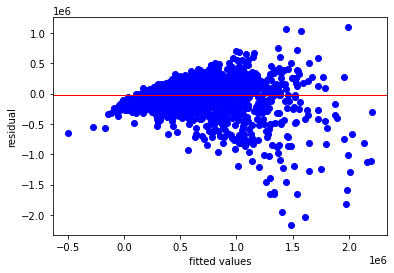

In [61]:
#residual plot
plt.scatter(y_predict,residuals, color='blue')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y=residuals.mean(),color='red',linewidth=1)
plt.show()

The plot takes a cone shape meaaning there is heteroscedasticity and this impies that that the issue is not caused by underlined bias and this will be further investigated by performing  bartlett test

**Heteroskedasticity test**

In [62]:
import scipy as sp
test_result, p_value = sp.stats.bartlett(y_predict,residuals)

#calculate critical value of the chi squared distribution
degree_of_freedom = len(y_predict)-1
probability = 1- p_value

critical_value = sp.stats.chi2.ppf(probability, degree_of_freedom)

#test whether variance is homogeneous across our dataset
if(test_result > critical_value):
  print('The variance are unequal, and the model should be reassessed')
else:
  print('The variance are homogeneous')

The variance are homogeneous


## Challenging the solution with other models

###6.Quantile Regression

- Deals with percentile
- Hypothesis is set by default

- outliers
-high skewness
-heteroscedasticity

**Limitations**
- It is to be kept in mind that the coefficients which we get in quantile regression for a particular quantile should differ significantly from those we obtain from linear regression.
- If it is not so then our usage of quantile regression isn't justifiable. This can be done by observing the confidence intervals of regression coefficients of the estimates obtained from both the regressions.

-Ridge regression will perform better when the outcome is a function of many predictors, all with coefficients of roughly equal size.

###7.Lasso regression

-performs feature selection by shrinking coefficients to zero
- normality is not assumed

- Lasso regression might perform better in a situation where some of the predictors have large coefficients, and the remaining predictors have very small coefficients

- In Lasso regression, if a group of predictors is highly correlated, lasso picks only one of them and shrinks the others to zero. 

In [63]:
#Dependent and independent variables
X,y = house[[ 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long',
       'sqft_living15', 'sqft_lot15']].values,house['price'].values

In [64]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
#Scaling the data
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [65]:
#Creating lasso model
lasso = linear_model.Lasso()

#fitting the model
lasso.fit(X,y)

Lasso()

In [66]:
#printing score,MSE and coefficients
print("lasso score:", lasso.score(X,y))
print("lasso MSE:", mean_squared_error(y, lasso.predict(X)))
print("lasso coef:", lasso.coef_)
print('Root Mean squared Error:',np.sqrt(y, lasso.predict(X)))

lasso score: 0.6954710465375181
lasso MSE: 41104174460.74734
lasso coef: [-31769.44374354  32424.57430828 256755.07691825   5255.97888026
    449.75297634  50831.79363184  37996.65535565  20236.83700672
 114411.18481849 -82761.97831086 -58770.79740555 -72195.23900402
   8734.24458098  77765.69101753 -16474.6710401   18793.96560341
 -10728.2289733 ]
Root Mean squared Error: [471.06262853 733.48483284 424.26406871 ... 634.114343   632.45553203
 570.08771255]


In [67]:
#Spliting the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}


In [68]:
#fitting the model 
linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 


In [69]:
# Fitting models 
gridlasso.fit(X_train, y_train) 
linear.fit(X_train, y_train) 
print("lasso best parameters:", gridlasso.best_params_) 
print("lasso score:", gridlasso.score(X_test, y_test))
print("linear score:", linear.score(X_test, y_test)) 
print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
print("linear coef:", linear.coef_)

lasso best parameters: {'alpha': 24.0}
lasso score: 0.7014619087958887
linear score: 0.701364454216594
lasso MSE: 39043305560.22448
linear MSE: 39056050831.36324
lasso best estimator coef: [-31109.31320123  31908.50998696 206196.77014809   7236.73766672
    467.76839615  49527.64707136  37363.68079389  19318.76451727
 115175.37794059 -35220.52240856 -32238.48892522 -72070.88726813
   8721.28552413  78025.05163156 -16362.46705263  16990.10118548
 -11744.28453154]
linear coef: [-3.10354869e+04  3.24727459e+04  6.95581745e+17  7.22927977e+03
  6.51722485e+02  4.94732180e+04  3.73669116e+04  1.93197623e+04
  1.15109467e+05 -6.27148861e+17 -3.35189190e+17 -7.20555958e+04
  8.66500739e+03  7.80379290e+04 -1.63807249e+04  1.72531499e+04
 -1.17665948e+04]


In [70]:
#Printing the summary of lasso
gridlasso  = sm.OLS(y_train,X_train).fit()

print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.901
Model:                            OLS   Adj. R-squared (uncentered):              0.901
Method:                 Least Squares   F-statistic:                          1.232e+04
Date:                Sun, 24 Apr 2022   Prob (F-statistic):                        0.00
Time:                        20:37:26   Log-Likelihood:                     -2.9497e+05
No. Observations:               21608   AIC:                                  5.900e+05
Df Residuals:                   21592   BIC:                                  5.901e+05
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

- For a uinit increase in bedrooms price decreases by -3.566e+04 units  
- For a uinit increase in bathrooms price increses by 4.588e+04 units 
- For a uinit increase in sqft_living price increases by 108.6241 units      
- For a uinit increase in sqft_lot price increses by  0.0342 units    
- For a uinit increase in floors price increses by 1.561e+04 units  


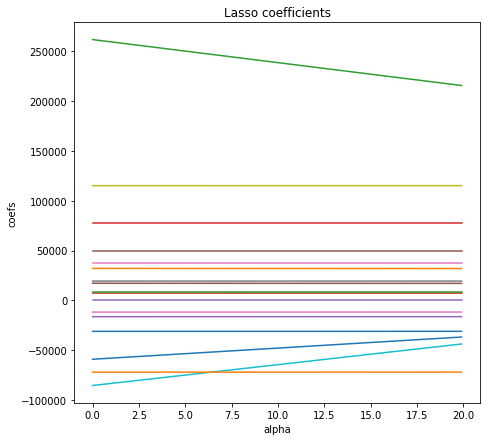

In [71]:
#lasso visualization
coefsLasso = [] 

# Building Lasso for 200 values of alpha and write the coefficients into array
alphasLasso = np.arange (0, 20, 0.1) 
for i in range(200):
    lasso = linear_model.Lasso(alpha=alphasLasso[i])
    lasso.fit(X_train, y_train)
    coefsLasso.append(lasso.coef_) 

# Building Lasso coefficient plots
# 
plt.figure(figsize = (16,7))

plt.subplot(121)
plt.plot(alphasLasso, coefsLasso)
plt.title('Lasso coefficients')
plt.xlabel('alpha')
plt.ylabel('coefs')

plt.show()


###8.Ridge regression


In [72]:
#Feature variables
X=house.drop(columns=['price'])

#Target variables
y=house['price']

In [73]:
#Base model mean squared error
regression = LinearRegression()
regression.fit(X,y)
y_true = y
y_pred=regression.predict(X)
print("Coefficients:",regression.coef_)
first_model =(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("Mean square error:",first_model)

Coefficients: [-3.41588451e+04  4.21063816e+04  1.08780579e+02  1.26960538e-01
  8.33027342e+02  5.87489229e+05  4.95938482e+04  3.10989633e+04
  9.73312995e+04  7.08140127e+01  3.79665667e+01 -2.45811401e+03
  2.17555901e+01  5.61188725e+05 -1.16995169e+05  2.74294780e+01
 -3.92986675e-01]
Mean square error: 41104174422.5116


In [74]:
#Defining ridgr regression
ridge= Ridge(normalize=True)
search= GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

In [75]:
#determine the alpha 
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

In [91]:
#detemining the strength of the model
{'alpha':0.01}
abs(search.best_score_)


41621989393.53528

the value 41621989393.53528 which is themean squared error is worse than the
mean squared error for baseline model which is 41104174422.51162

hence we will perform ridge confirmation by fitting the model with ridge information and fitting the mean squared error

In [77]:
#confirmation
ridge=Ridge(normalize=True,alpha=0.01)
ridge.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=regression.predict(X)))
print("Mean Squared error:",second_model)
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_true=y,y_pred=regression.predict(X))))

Mean Squared error: 41104174422.5116
RMSE:  202741.64451959936


41104174422.51162 is lower than the 41592394469.90386. This is because the last results are not cross-validated and they also indicate that there is little difference between the ridge as it is confirmed with the coefficients in each model found below

In [92]:
coef_dict_baseline = {}
for coef,feat in zip(regression.coef_, house.columns):
  coef_dict_baseline[feat]=coef
coef_dict_baseline

{'bathrooms': 108.78057931656521,
 'bedrooms': 42106.38162727906,
 'condition': 97331.29945677936,
 'floors': 587489.2290002764,
 'grade': 70.81401269054021,
 'lat': -116995.16921303383,
 'long': 27.42947803892529,
 'price': -34158.84511896979,
 'sqft_above': 37.96656667099122,
 'sqft_basement': -2458.1140065008517,
 'sqft_living': 0.12696053801754467,
 'sqft_living15': -0.3929866750456179,
 'sqft_lot': 833.0273424004376,
 'view': 31098.963318998998,
 'waterfront': 49593.848179756096,
 'yr_built': 21.755590119154803,
 'yr_renovated': 561188.7247240745}

The coefficient values are about the same which means that the penalization made little difference with this dataset.

In [93]:
#add a constant
X=sm.add_constant(X)

#Summary in Ridge regression
ridge = sm.OLS(y,X).fit()

print(ridge.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:41:06   Log-Likelihood:            -2.9470e+05
No. Observations:               21608   AIC:                         5.894e+05
Df Residuals:                   21591   BIC:                         5.896e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.089


- For a uinit increase in bedrooms price decreases by -3.416e+04 units  
- For a uinit increase in bathrooms price increses by 4.211e+04 units 
- For a uinit increase in sqft_living price increases by 108.7811 units      
- For a uinit increase in sqft_lot price increses by  0.1270 units    
- For a uinit increase in floors price increses by 833.0273 units  
- For a uinit increase in waterfront price increses by 5.875e+05 units  
- For a uinit increase in view price increses by  4.959e+04 units  
- For a uinit increase in condition price increses by 3.11e+04 units  
- For a uinit increase in grade price increses by  9.733e+04 units  
- For a uinit increase in sqft_above price increses by  70.8135 units      
- For a uinit increase in sqft_basement price increses by  37.9660 units     
- For a uinit increase in yr_built price decreases by  -2458.1140 units    
- For a uinit increase in yr_renovated price increses by  21.7556 units     
- For a uinit increase in lat price increses by  5.612e+05 units  
- For a uinit increase in long price decreases by  -1.17e+05 units  
- For a uinit increase in sqft_living15 price increses by 27.4295 units     
- For a uinit increase in sqft_lot15 price decreases by  -0.3930 units

###9.Elastic Net Regression

- On top of the least-squares method, it introduces a penalty on regression coefficients which is a convex combination of lasso and ridge penalty.
- It encourages group effect in case of highly correlated variables. 
- There are no limitations on the number of selected variables. This is a limitation of the Lasso regression method.
- A limitation of Elastic net regression is that it can suffer from double shrinkage, which leads to increased bias and poor predictions.

In [94]:
#Elastic net model
elastic = ElasticNet(normalize=True)
search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)


In [95]:
#Fit the model and display best parameter
search.fit(X,y)
search.best_params_


{'alpha': 1e-05, 'l1_ratio': 0.8}

In [96]:
#Best score
abs(search.best_score_)

41621989393.53528

In [97]:
#settint the hyperparameters for clarification
elastic=ElasticNet(normalize=True,alpha=0.00005, l1_ratio=0.8)
elastic.fit(X,y)
second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
print("RMSE: ",np.sqrt(metrics.mean_squared_error(y_true=y,y_pred=elastic.predict(X))))
print(second_model)


RMSE:  205731.61881141373
42325498978.76485


In [98]:
#add a constant
X=sm.add_constant(X)

#Summary in ElasticNet regression
elastic = sm.OLS(y,X).fit()

print(elastic.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.695
Method:                 Least Squares   F-statistic:                     3082.
Date:                Sun, 24 Apr 2022   Prob (F-statistic):               0.00
Time:                        20:41:35   Log-Likelihood:            -2.9470e+05
No. Observations:               21608   AIC:                         5.894e+05
Df Residuals:                   21591   BIC:                         5.896e+05
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -3.686e+07    1.6e+06    -23.089

- For a uinit increase in bedrooms price decreases by -3.416e+04 units  
- For a uinit increase in bathrooms price increses by 4.211e+04 units 
- For a uinit increase in sqft_living price increases by 108.7811 units      
- For a uinit increase in sqft_lot price increses by  0.1270 units    
- For a uinit increase in floors price increses by 833.0273 units  
- For a uinit increase in waterfront price increses by 5.875e+05 units  
- For a uinit increase in view price increses by  4.959e+04 units  
- For a uinit increase in condition price increses by 3.11e+04 units  
- For a uinit increase in grade price increses by  9.733e+04 units  
- For a uinit increase in sqft_above price increses by  70.8135 units      
- For a uinit increase in sqft_basement price increses by  37.9660 units     
- For a uinit increase in yr_built price decreases by  -2458.1140 units    
- For a uinit increase in yr_renovated price increses by  21.7556 units     
- For a uinit increase in lat price increses by  5.612e+05 units  
- For a uinit increase in long price decreases by  -1.17e+05 units  
- For a uinit increase in sqft_living15 price increses by 27.4295 units     
- For a uinit increase in sqft_lot15 price decreases by  -0.3930 units

##11.Conclusion

Linear regression remained to be the best model according to the analysis since it had the highest R-Square and the lowest RMSE

In [99]:
#idependent variables
X=house.drop(columns=['price'])
y=house['price']

In [100]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
#comparission between linear,Lasso,Ridge and ElasticNet
house_lr = LinearRegression()
house_ls = Lasso()
house_rg = Ridge()
house_en = ElasticNet()
models = [(house_lr,'Linear Regression'),
          (house_ls, 'Lasso'),
          (house_rg, 'Ridge'),
          (house_en, 'ElasticNet')]


In [101]:
#Scale the data
house_ss = StandardScaler()
#target variable
X_scaled = house_ss.fit_transform(X=X)

#spliting the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y,test_size=0.25,random_state=0)



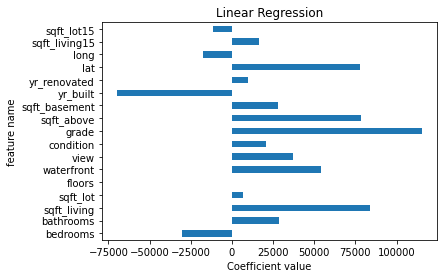

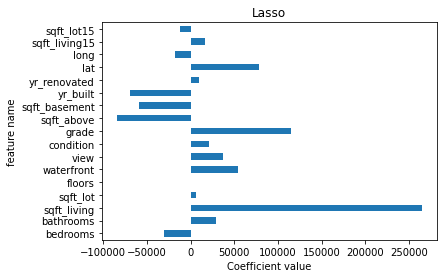

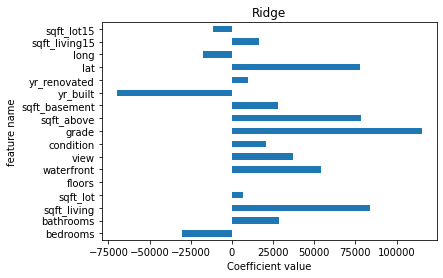

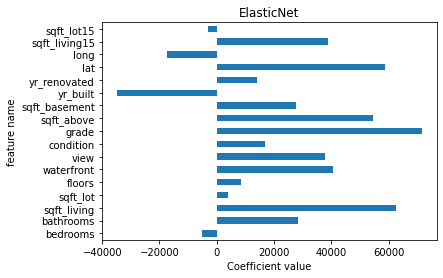

In [102]:
#fitting the model and graph coefficients
for model in models:
  model[0].fit(X_train,y_train)
  pd.Series(model[0].coef_,index=X.columns).plot(kind='barh')
  plt.title(model[1])
  plt.xlabel('Coefficient value')
  plt.ylabel('feature name')
  plt.show()

In [103]:
#model scores
for model in models:
  mse =mean_squared_error(model[0].predict(X_test),y_test)
  rmse =np.sqrt(metrics.mean_squared_error(model[0].predict(X_test),y_test))
  print(f"Root Mean Squared Error of {model[1]}:{rmse:.2f}")

Root Mean Squared Error of Linear Regression:196354.72
Root Mean Squared Error of Lasso:196354.95
Root Mean Squared Error of Ridge:196354.15
Root Mean Squared Error of ElasticNet:202961.34


Accord to the analysis, the best model is ridge regression sinse it has the lowest RMSE of 196354.15 while the worst model is ElasticNet since it has RMSE of 202961.34

### Coefficient interpretation in different models

**LinearRegression**

- For a uinit increase in bedrooms price decreases by -3.284e+04 units  
- For a uinit increase in bathrooms price increses by 3.844e+04 units 
- For a uinit increase in sqft_living price increases by 110.9823 units 

**Lasso Regression**

- For a uinit increase in bedrooms price decreases by -3.566e+04 units
- For a uinit increase in bathrooms price increses by 4.588e+04 units
- For a uinit increase in sqft_living price increases by 108.6241 units

**Ridge Regression**

- For a uinit increase in bedrooms price decreases by -3.416e+04 units  
- For a uinit increase in bathrooms price increses by 4.211e+04 units 
- For a uinit increase in sqft_living price increases by 108.7811 units  

**ElasticNet**

- For a uinit increase in bedrooms price decreases by -3.416e+04 units  
- For a uinit increase in bathrooms price increses by 4.211e+04 units 
- For a uinit increase in sqft_living price increases by 108.7811 units 

##12.Recommendation

More data is needed in order to improve the accuracy of the model.